**Binary classification**  
Model_1 - 5s 109ms/step - loss: 0.3652 - accuracy: 0.8440 - val_loss: 0.3374 - val_accuracy: 0.8660  
Model_2 - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000  
Model_3 - 5s 106ms/step - loss: 0.5209 - accuracy: 0.7867 - val_loss: 0.5065 - val_accuracy: 0.7500  
Model_4 - 5s 112ms/step - loss: 0.1465 - accuracy: 0.9520 - val_loss: 0.3990 - val_accuracy: 0.8340  
Model_5 - 5s 109ms/step - loss: 0.3743 - accuracy: 0.8473 - val_loss: 0.3403 - val_accuracy: 0.8640  
Model_6 - 23s 488ms/step - loss: 0.6707 - accuracy: 0.5733 - val_loss: 0.6583 - val_accuracy: 0.6540  
Model_7 - 23s 480ms/step - loss: 0.4426 - accuracy: 0.8113 - val_loss: 0.3158 - val_accuracy: 0.8860

**Multi-class classification**  
Model_8 - 28s 117ms/step - loss: 0.4970 - accuracy: 0.8468 - val_loss: 3.5566 - val_accuracy: 0.2324  
Model_10 - 85s 361ms/step - loss: 1.9848 - accuracy: 0.3076 - val_loss: 1.8918 - val_accuracy: 0.3420

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [116]:
STORAGE = os.path.join('..', 'storage')
BINARY_CLASSIFICATION_PATH = f'{STORAGE}/binary_classification'
MULTI_CLASS_CLASSIFICATION_PATH = f'{STORAGE}/multi_class_classification'
IMAGE_PATH = f'{STORAGE}/images'
ZIP_PATH = f'{STORAGE}/zip'
MODEL_PATH = f'{STORAGE}/models'

In [117]:
LIST_PATHS = [BINARY_CLASSIFICATION_PATH,
              MULTI_CLASS_CLASSIFICATION_PATH,  IMAGE_PATH, ZIP_PATH, MODEL_PATH]

In [118]:
for dir in LIST_PATHS:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [6]:
import zipfile
import urllib.request
import shutil

url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'

if not os.path.exists(f'{ZIP_PATH}/{filename}'):
    # download zip file
    urllib.request.urlretrieve(url, filename)
    shutil.move(filename, f'{ZIP_PATH}')

# unzip the download file
zip_ref = zipfile.ZipFile(f'{ZIP_PATH}/{filename}', 'r')

# remove folder if exist
folder = filename.split('.')[0]
if os.path.isdir(f'{BINARY_CLASSIFICATION_PATH}/{folder}'):
    shutil.rmtree(f'{BINARY_CLASSIFICATION_PATH}/{folder}')

zip_ref.extractall(f'{BINARY_CLASSIFICATION_PATH}')
zip_ref.close()

In [7]:
DATASET = f'{BINARY_CLASSIFICATION_PATH}/{folder}'

# Walk through pizza_steak directory and list number fo files
for dirpath, dirnames, filenames in os.walk(f'{DATASET}'):
    print(
        f'directories: {len(dirnames)} images: {len(filenames)} path: "{dirpath}".')

directories: 2 images: 0 path: "..\storage/binary_classification/pizza_steak".
directories: 2 images: 0 path: "..\storage/binary_classification/pizza_steak\test".
directories: 0 images: 250 path: "..\storage/binary_classification/pizza_steak\test\pizza".
directories: 0 images: 250 path: "..\storage/binary_classification/pizza_steak\test\steak".
directories: 2 images: 0 path: "..\storage/binary_classification/pizza_steak\train".
directories: 0 images: 750 path: "..\storage/binary_classification/pizza_steak\train\pizza".
directories: 0 images: 750 path: "..\storage/binary_classification/pizza_steak\train\steak".


In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path(f'{DATASET}/train')
# create a list of class_names from subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
# Let' visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # set the target directory (we'll view all images from here)
    target_folder = target_dir + target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'image shape: {img.shape}')  # show the shape of the image
    return img

image shape: (512, 512, 3)


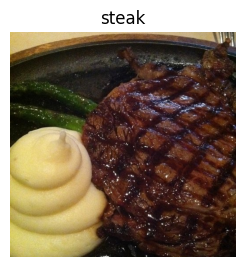

In [10]:
# view a random image from the training dataset
plt.figure()
plt.subplot(1, 2, 1)
img = view_random_image(target_dir=f'{DATASET}/train/', target_class='steak')

In [11]:
# An end-to-end example
# set the seed
tf.random.set_seed(42)

# preprocess data get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = f'{DATASET}/train'
test_dir = f'{DATASET}/test'

# import data from directories and turn into batces
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compile CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [14]:
# Fit the CNN
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 368ms/step - loss: 0.5951 - accuracy: 0.6680 - val_loss: 0.4444 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4356 - accuracy: 0.8007 - val_loss: 0.3389 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4095 - accuracy: 0.8147 - val_loss: 0.3388 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3687 - accuracy: 0.8540 - val_loss: 0.3054 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3136 - accuracy: 0.8720 - val_loss: 0.3085 - val_accuracy: 0.8660


In [15]:
# set random seed
tf.random.set_seed(42)

# create the model to replicate the TensorFlow Playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [17]:
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 0.8550 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6938 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.4960
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6938 - accuracy: 0.5107 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6938 - accuracy: 0.4940 - val_loss: 0.6929 - val_accuracy: 0.5200
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6935 - accuracy: 0.4993 - val_loss: 0.6929 - val_accuracy: 0.5180


In [18]:
# set random seed
tf.random.set_seed(42)

# create the model to replicate the TensorFlow Playground
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 135ms/step - loss: 3.6329 - accuracy: 0.6327 - val_loss: 1.0375 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.9763 - accuracy: 0.6947 - val_loss: 0.5358 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6384 - accuracy: 0.7313 - val_loss: 0.5715 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.7234 - accuracy: 0.7353 - val_loss: 0.4973 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.8184 - accuracy: 0.7167 - val_loss: 0.7586 - val_accuracy: 0.6100


image shape: (512, 512, 3)
image shape: (384, 512, 3)


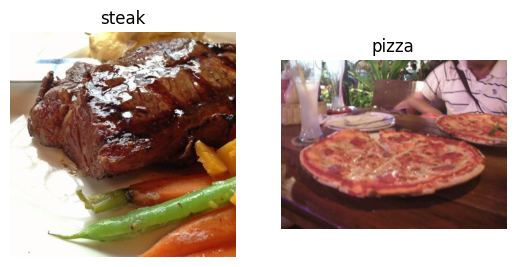

In [21]:
# visualize
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(
    target_dir=f'{DATASET}/train/', target_class='steak')

plt.subplot(1, 2, 2)
pizza_img = view_random_image(
    target_dir=f'{DATASET}/train/', target_class='pizza')

## Preprocessing the data (prepare it for a model)


In [22]:
# Define directory dataset path
TRAIN_DIR = f'{DATASET}/train/'
TEST_DIR = f'{DATASET}/test/'

Our next step is to turn our data into **batches** A batch is a small subset of data. Rather than look at all ~10.000 images at one time, a model might only look at 32 a time. It does this for a couple of reasons:

1. 10.000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10.000 images in on hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

see: https://medium.com/data-science-365/determining-the-right-batch-size-for-a-neural-network-to-get-better-and-faster-results-7a8662830f15

- **batch_size**: Is another important hyperparameter that we need adjust before training process because it directly impact on the model's performance and training time.

**What is a batch_size?**

Batch size reffers to the number of traning instances in the batch


In [39]:
!nvidia-smi

Sat Nov  4 13:42:41 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8               4W /  50W |   2824MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories an turn them into batches
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR,  # target directory of images
                                               # target size of imeages (height, width)
                                               target_size=(224, 224),
                                               class_mode='binary',  # type of data you're working with
                                               batch_size=32)  # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=TEST_DIR,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# get a sample of a train data batch
images, labels = train_data.next()  # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [26]:
# How many batch are there?
len(train_data), 1500/32

(47, 46.875)

In [27]:
# get the first image
images[0].shape

(224, 224, 3)

In [28]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## Create a CNN model (start with baseline)

A baseline is a relatively model or existing result that you setup when begining a machine learning experimenting you try to beat the baseline.

> **Note** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something and see if it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem).


In [29]:
# imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [30]:
# set random seed
tf.random.set_seed(42)

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,  # filter is the number of sliding windows
           kernel_size=3,  # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window take across input8
           # if 'same' output is same as input shape, if 'valid', output shape gets compressed
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    # output layer (working with binary classification so only 1 output neuron)
    Dense(1, activation='sigmoid')
])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Breakdown of Conv2D layer

```python
tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same')
tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same') # same code above
```

Description:

| Hyperparameter name | What does it do?                                                                             | Typical values                                          |
| ------------------- | -------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| Filters             | Decide how many filters should pass over an input tensor                                     | 10, 32, 64, 128 (higher values lead more complex model) |
| kernel Size         | Determine the shape of the filters (sliding windows)                                         | 3, 5, 7 (lowers values learn smaller features)          |
| Padding             | Pads the target tensor with zeros "same" preserve input shape, "valid" lowering output shape | same or valid                                           |
| Strides             | the number of steps a filter takes across an image at the time                               | 1 default, 2                                            |


In [31]:
# check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,  # is a combination of labels and sample
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 1.3215 - accuracy: 0.5420 - val_loss: 0.6837 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6416 - accuracy: 0.6960 - val_loss: 0.5926 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4766 - accuracy: 0.7907 - val_loss: 0.4877 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2522 - accuracy: 0.9147 - val_loss: 0.5453 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.1337 - accuracy: 0.9627 - val_loss: 0.5368 - val_accuracy: 0.7740


### Evaluate our model

it looks like our model is learning something let's evaluate it.


<AxesSubplot:>

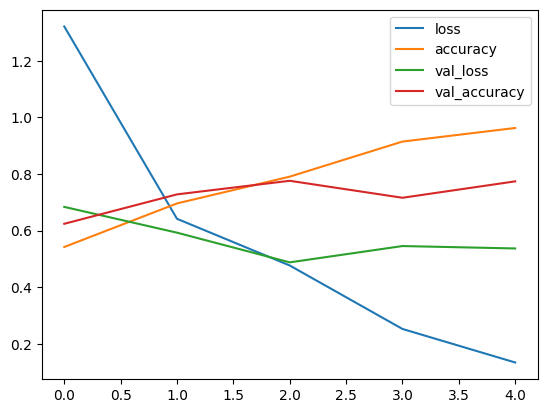

In [34]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [35]:
# plot the validation and traiing curve separately
def plot_loss_curve(history):
    """
        Return separate loss curve training and validation metrics
    """
    plt.figure(figsize=(15, 5))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

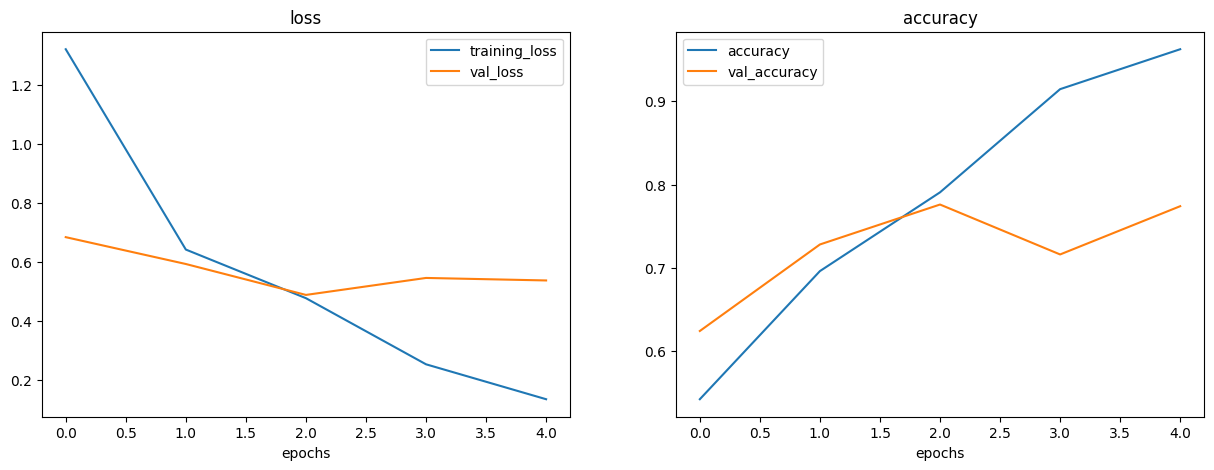

In [36]:
# check out the loss and accuracy of model_4
plot_loss_curve(history_4)

> **Note** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be dismeshed.

Ideally the two loss curves (training and validation) will be very similar to each other decreasing at similar rates, when there are large differences your model be **overfitting**


### Adjust the model parameters

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting

- Increase the number of conv layers
- Increate the number of conv filters
- Add another dense layer to the output of our flattened layer

Reduce overfitting:

- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data


In [37]:
# set random seed
tf.random.set_seed(42)

# create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [38]:
# compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        verbose=1)

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 0.5956 - accuracy: 0.6920 - val_loss: 0.4471 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4593 - accuracy: 0.7973 - val_loss: 0.4433 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4371 - accuracy: 0.8047 - val_loss: 0.3717 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3973 - accuracy: 0.8240 - val_loss: 0.3854 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3883 - accuracy: 0.8367 - val_loss: 0.3162 - val_accuracy: 0.8720


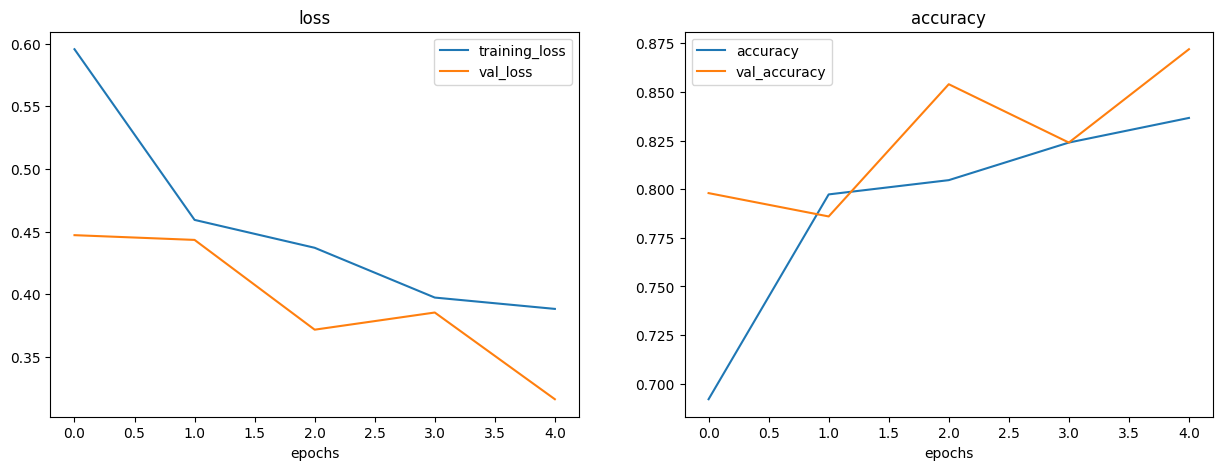

In [40]:
# check out the loss and accuracy of model_5
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

**Question** what is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...


In [41]:
# create ImageDataGenerator training instance with data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.5,  # how much do you want to rotate an image?
                                             shear_range=0.2,  # how much do you want to shear an image?
                                             zoom_range=0.2,  # zoom in randomly on an image
                                             width_shift_range=0.2,  # move your image around on the x-axis
                                             height_shift_range=0.3,  # move your image around on the y-axis
                                             horizontal_flip=True)  # do you want to flip and image?

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
# import data and augment it from training directory
IMG_SIZE = (224, 224)
CLASS_MODE = 'binary'
BATCH_SIZE = 32

# create augmented train data batches
print(f'Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode=CLASS_MODE,
                                                                   shuffle=False)  # for demonstration purposes

# data non-augmented train data batches
print(f'Non-augmented training data:')
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE,
                                               shuffle=False)


# create non-augmented test data batches
print(f'Non-augmented test data')
test_data = test_datagen.flow_from_directory(directory=TEST_DIR,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode=CLASS_MODE,
                                             shuffle=True)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> **Note** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!


In [43]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

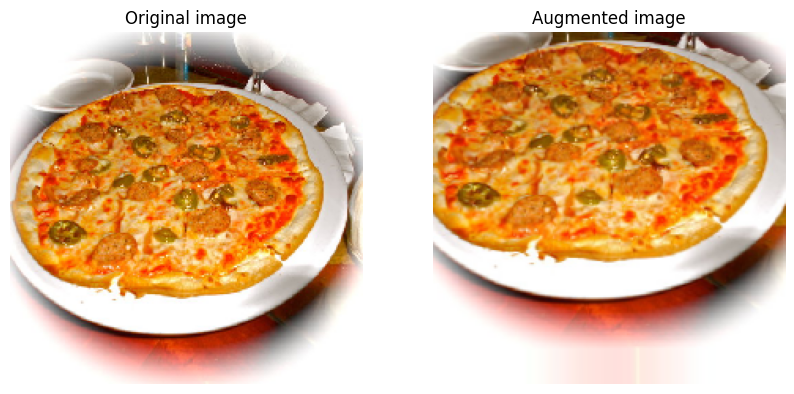

In [44]:
# show original image and augmented image
import random
random_number = random.randint(0, 32)  # our batch sizes are 32
plt.figure(figsize=(10, 5))

print(f'showing image number: {random_number}')
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how


In [48]:
# set random seed
tf.random.set_seed(42)

# create a model with augemented data
model_6 = Sequential()
model_6.add(Conv2D(10, 3, activation='relu',
            input_shape=(224, 224, 3)))  # input layer
model_6.add(MaxPool2D(pool_size=2))

model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())

model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())

model_6.add(Flatten())
model_6.add(Dense(1, activation='sigmoid'))  # output layer
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

In [49]:
# compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [47]:
# fit the model
history_6 = model_6.fit(train_data_augmented,  # fitting model_6 on augemented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 386ms/step - loss: 0.7106 - accuracy: 0.4360 - val_loss: 0.6931 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 17s 359ms/step - loss: 0.6962 - accuracy: 0.6227 - val_loss: 0.6884 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 17s 362ms/step - loss: 0.7095 - accuracy: 0.5260 - val_loss: 0.6742 - val_accuracy: 0.5780
Epoch 4/5
47/47 [==============================] - 17s 370ms/step - loss: 0.7015 - accuracy: 0.5287 - val_loss: 0.6710 - val_accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6904 - accuracy: 0.5387 - val_loss: 0.6517 - val_accuracy: 0.5780


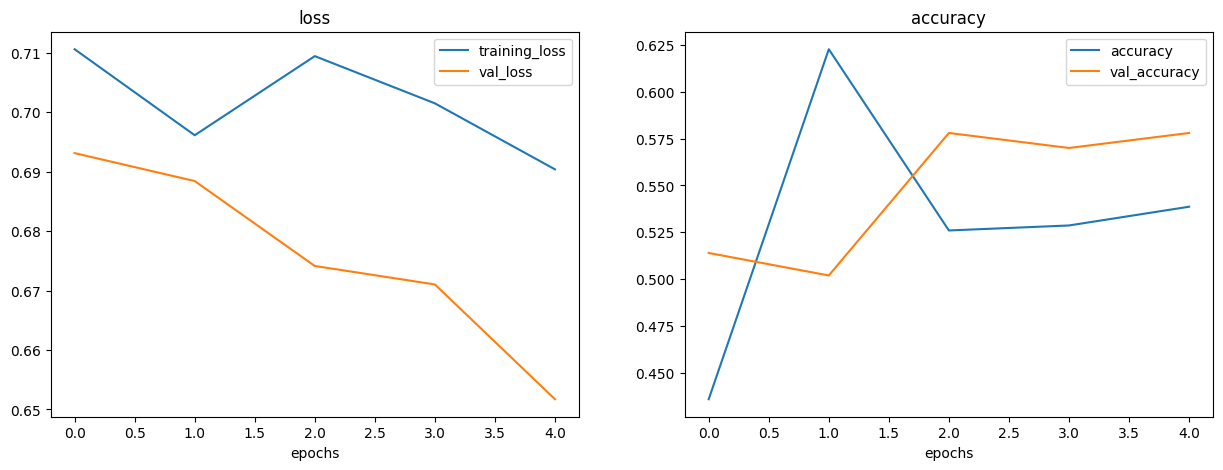

In [50]:
# check out the loss and accuracy of model_6
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.


In [51]:
# create augmented train data batches
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                                            target_size=(
                                                                                224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [52]:
# set random seed
tf.random.set_seed(42)

# create the model
model_7 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),  # input layer
    MaxPool2D(pool_size=2),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation='sigmoid')  # output layer
])

model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 10)      

In [53]:
# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [54]:
# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 362ms/step - loss: 0.6602 - accuracy: 0.5927 - val_loss: 0.5725 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 18s 376ms/step - loss: 0.5824 - accuracy: 0.7093 - val_loss: 0.4144 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 17s 365ms/step - loss: 0.5087 - accuracy: 0.7647 - val_loss: 0.4064 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 17s 369ms/step - loss: 0.4852 - accuracy: 0.7780 - val_loss: 0.3464 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 17s 368ms/step - loss: 0.4669 - accuracy: 0.7833 - val_loss: 0.3158 - val_accuracy: 0.8680


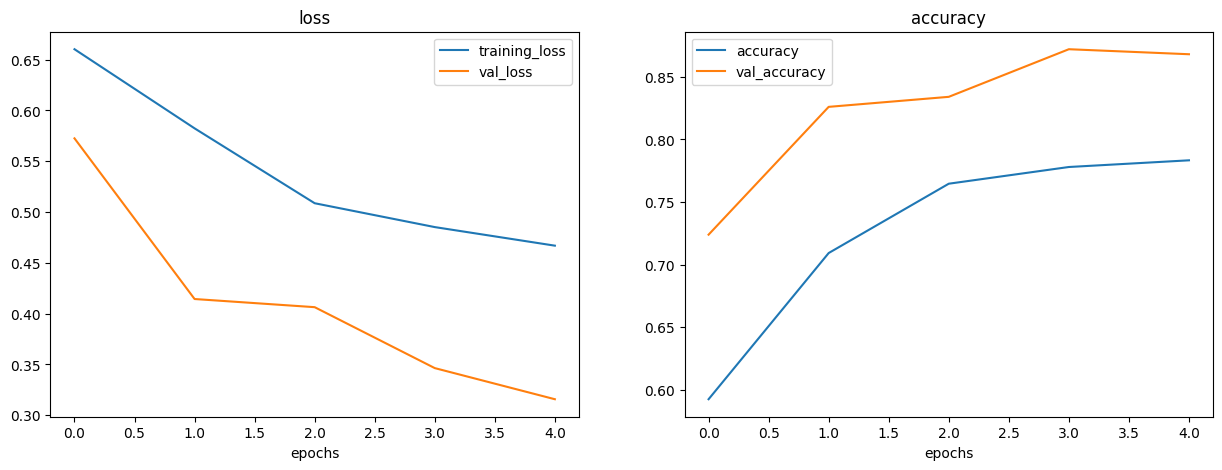

In [55]:
plot_loss_curve(history_7)

> **Note** When shuffling training data, the model get exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).


## Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

- increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
- increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
- train for longer (more epochs)
- find an ideal learning rate
- get more data (give the model more oportunities to learn)
- use **transfer learning** to leverage what another image model has learn and adjust it for our own use case


## Making a prediction with our trained model on our own custom data


In [56]:
# classes we're working with
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

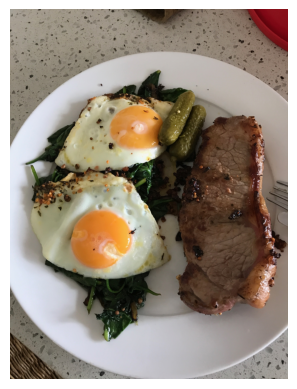

In [65]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib.request

url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
filename = '03-steak.jpeg'

if not os.path.exists(f'{IMAGE_PATH}/{filename}'):
    urllib.request.urlretrieve(url, f'{IMAGE_PATH}/{filename}')

steak = mpimg.imread(f'{IMAGE_PATH}/{filename}')
plt.imshow(steak)
plt.axis(False)

In [66]:
steak.shape

(4032, 3024, 3)

> **Note** When you a train a neural network and you want to make prediction with it on your own custom data, it's important than your custom data (or new data) is preproccessed into the same format as the data your model was trained on.


In [61]:
# create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filepath, img_shape=224):
    """
        Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    """

    # Read in the image
    img = tf.io.read_file(filepath)

    # decode the read file into a tensor
    img = tf.image.decode_image(img)

    # resize de image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # rescale the image (get all values between 0 and 1)
    img = img/255.

    return img

In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image(f'{IMAGE_PATH}/{filename}')
steak.shape

TensorShape([224, 224, 3])

In [68]:
y_pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 1s 514ms/step


Looks like our custom image is being put through our model, however, it currently outputs a predictions, visualize the image as well as the model's prediction?


In [69]:
# we can index the predicted by class rounding the prediction probability
class_names[int(tf.round(y_pred))]

'steak'

In [70]:
def pred_and_plot(model, filename, class_names=class_names):
    """
        imports an image located at filename, makes a predictions with model
        and plots the image with the predicted class as the title
    """

    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 20ms/step


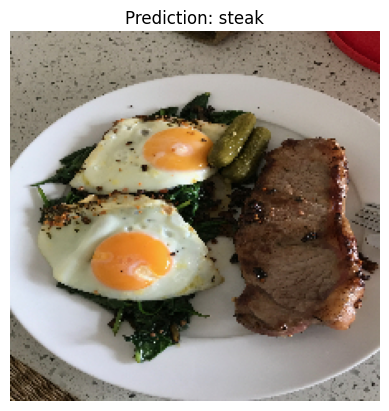

In [71]:
# Test our model on a custom image
pred_and_plot(model_7, f'{IMAGE_PATH}/{filename}')

1/1 [==============================] - 0s 25ms/step


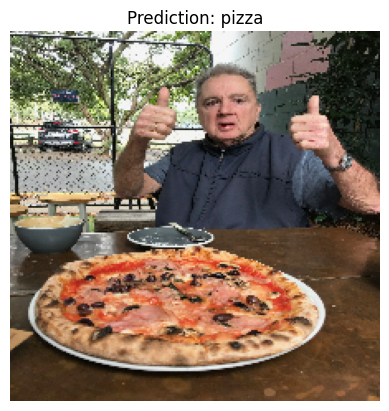

In [72]:
# download another test custom image and make a prediction on it
url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'
filename = '03-pizza-dad.jpeg'

if not os.path.exists(f'{IMAGE_PATH}/{filename}'):
    urllib.request.urlretrieve(url, f'{IMAGE_PATH}/{filename}')

pred_and_plot(model_7, f'{IMAGE_PATH}/{filename}')

# Multi-class classification

We've just been through a bunch fo the following steps with a binary classification problem (pizza vs steak), now we're going to stpes things up a notch with 10 classes, multi-class classification

1. Become one with data
2. Prreproccess data (get it ready for a model)
3. Create a model (start with a baseline)
4. fit the model (over fit to make sure it works)
5. Evaluate the model
6. Adjust hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat to satisfied


## 1. Import and become one with data

download images: https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip  
download all images: https://www.kaggle.com/datasets/dansbecker/food-101


In [73]:
import zipfile
import urllib.request
import shutil

url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
filename = '10_food_classes_all_data.zip'

if not os.path.exists(f'{STORAGE}/zip/{filename}'):
    # download zip file
    urllib.request.urlretrieve(url, filename)

    # move file to zip folder
    shutil.move(filename, f'{STORAGE}/zip/')

# unzip the download file
zip_ref = zipfile.ZipFile(f'{STORAGE}/zip/{filename}', 'r')

# remove folder if exist
folder = filename.split('.')[0]
if os.path.isdir(f'{MULTI_CLASS_CLASSIFICATION_PATH}/{folder}'):
    shutil.rmtree(f'{MULTI_CLASS_CLASSIFICATION_PATH}/{folder}')

zip_ref.extractall(MULTI_CLASS_CLASSIFICATION_PATH)
zip_ref.close()

In [74]:
# base path dataset
DATASET = f'{MULTI_CLASS_CLASSIFICATION_PATH}/{folder}'

In [75]:
# knowing our data recent downloaded
for dirpath, dirname, filename in os.walk(DATASET):
    print(
        f'directories: {len(dirname)}, files: {len(filename)}, path: {dirpath}')

directories: 2, files: 0, path: ..\storage/multi_class_classification/10_food_classes_all_data
directories: 10, files: 0, path: ..\storage/multi_class_classification/10_food_classes_all_data\test
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\chicken_curry
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\chicken_wings
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\fried_rice
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\grilled_salmon
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\hamburger
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\ice_cream
directories: 0, files: 250, path: ..\storage/multi_class_classification/10_food_classes_all_data\test\pizza
directorie

In [76]:
# train path dataset
TRAIN_DIR = f'{DATASET}/train/'

# test path dataset
TEST_DIR = f'{DATASET}/test/'

In [77]:
# Let's get subdirectories (these are our classes names)
import pathlib
import numpy as np

data_dir = pathlib.Path(TRAIN_DIR)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [78]:
# descovering which is the mean from images hamburgers in our dataset
info_images = {'height': [], 'width': []}

for file in os.listdir(f'{TRAIN_DIR}/hamburger'):
    img = mpimg.imread(f'{TRAIN_DIR}/hamburger/{file}')

    info_images['height'].append(img.shape[0])
    info_images['width'].append(img.shape[1])

pd.DataFrame(info_images).describe()

,height,width
count,750.000000,750.000000
mean,464.924000,495.000000
std,70.530251,45.894987
min,265.000000,288.000000
25%,384.000000,512.000000
50%,512.000000,512.000000
75%,512.000000,512.000000
max,512.000000,512.000000


image shape: (341, 512, 3)


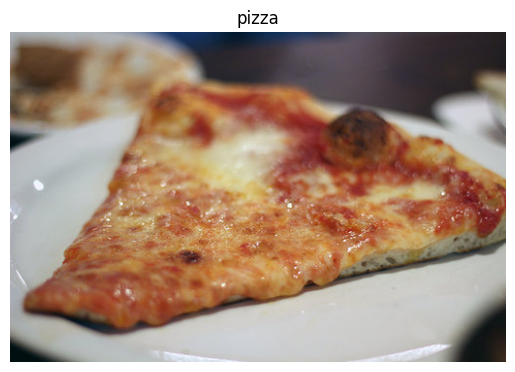

In [79]:
# visualize, visualize, visualize
import random

img = view_random_image(target_dir=TRAIN_DIR,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for model)

> **Note** `class_mode` default is `categorical` determines that type of label array that are returned.
> The `categorical` will be 2D one-hot encoded labels like that `[[0., 1.,]]`  
> The `binary` will be 1D binary labels `sparse` will be 1D integer labels


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale image
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data into directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                               target_size=(224, 224),
                                               class_mode='categorical')  # multi-class classification

test_data = test_datagen.flow_from_directory(directory=TEST_DIR,
                                             target_size=(224, 224),
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a Model (start with a baseline)

we've been talking a lot about CNN explainer website... How about we just take their model (also on 10 classes) and use it for our problem?


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [82]:
# set random seed
tf.random.set_seed(42)

# create a model (very similiar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),

    Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),

    Flatten(),
    # changed to have 10 output neurons and use the softmax activation function output
    Dense(10, activation='softmax')
])

model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [83]:
# compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [84]:
# Fit the model
history_8 = model_8.fit(train_data,  # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 87s 368ms/step - loss: 2.2313 - accuracy: 0.1661 - val_loss: 2.1749 - val_accuracy: 0.1816
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 2.0275 - accuracy: 0.2841 - val_loss: 2.0079 - val_accuracy: 0.2796
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.6759 - accuracy: 0.4243 - val_loss: 2.0698 - val_accuracy: 0.2840
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.0841 - accuracy: 0.6383 - val_loss: 2.4923 - val_accuracy: 0.2676
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.4970 - accuracy: 0.8468 - val_loss: 3.5566 - val_accuracy: 0.2324


## 5. Evaluate Model


In [85]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 3.5566 - accuracy: 0.2324


[3.5565710067749023, 0.23240000009536743]

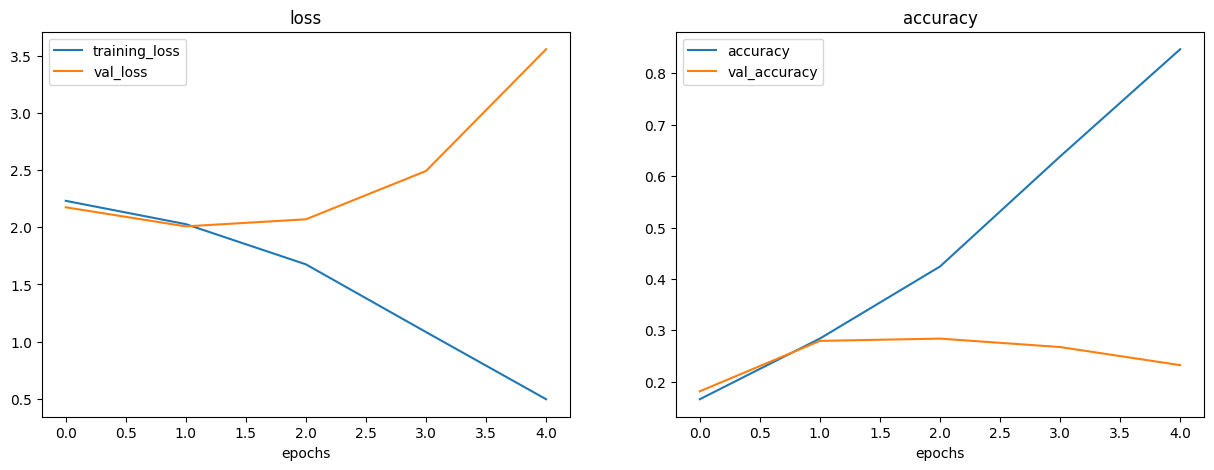

In [86]:
# check out the model's loss curves on the 10 classes
plot_loss_curve(history_8)

What do these losso curves tell us?

Well... it seems our model is **overfitting** the training sete quite badly.. in other words, it's getting great results on the training data but fails to generalize well unseen data and performs poorly on the test dataset.


## 6. Ajust the model hyperameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something... However, it's not generalizing well to unseen data (overfitting)..

So, let's try and fix overfitting by...

- **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
- **Simplify the model** - if our current model is overfitting the data, it may be too complicataed of a model, one way to simplify a model is to: reduce of layers or reduce hidden units layers.
- **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
- **Use transfer learning** - transfer learning leverages the patterns another model has learned on similiar data to your own and allows you to use those patterns on your dataset


In [87]:
# How about we try and simplify the model
# Let's try to remove 2 convolutiona layers...

# set random seed
tf.random.set_seed(42)

# create the model
model_9 = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), input_shape=(224, 224, 3)),
    MaxPool2D(),

    Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')
])

model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [88]:
# compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [89]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 135ms/step - loss: 2.1619 - accuracy: 0.2444 - val_loss: 1.9750 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.7672 - accuracy: 0.4017 - val_loss: 2.0437 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 30s 126ms/step - loss: 1.3381 - accuracy: 0.5609 - val_loss: 2.0982 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 0.8401 - accuracy: 0.7447 - val_loss: 2.3497 - val_accuracy: 0.2836
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.4385 - accuracy: 0.8776 - val_loss: 2.8423 - val_accuracy: 0.2852


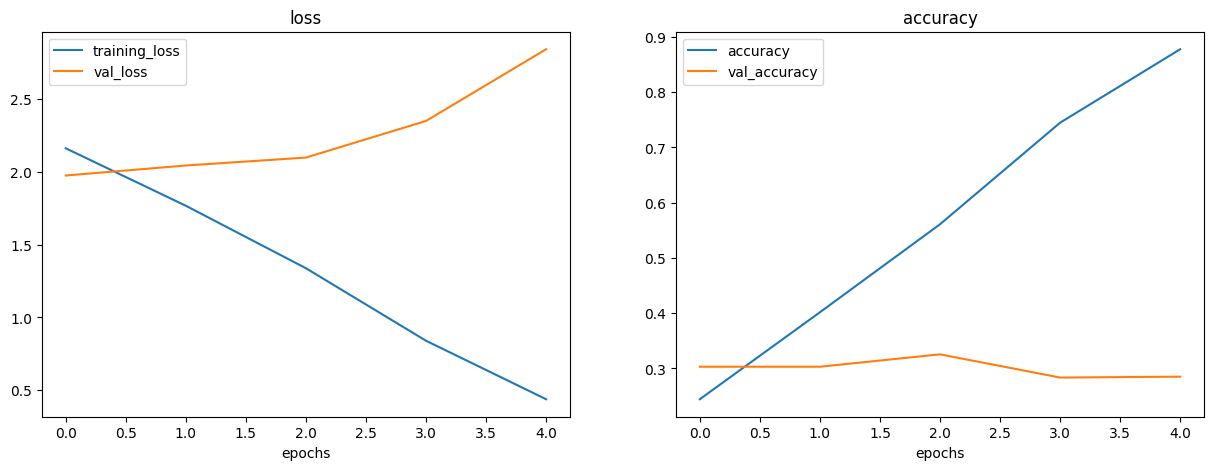

In [90]:
plot_loss_curve(history_9)

Looks like our **simplifying the model** experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augementation???


### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented trining data

Ideally, we want to:

- Reduce overfitting (get the train and validation loss curves closer)
- Improve validation accuracy


In [91]:
# create an augemented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                                   target_size=(
                                                                       224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [93]:
# Let's create another model but this time we'll fit it on the augemented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [94]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 93s 392ms/step - loss: 2.2620 - accuracy: 0.1729 - val_loss: 2.1047 - val_accuracy: 0.2376
Epoch 2/5
235/235 [==============================] - 86s 366ms/step - loss: 2.0852 - accuracy: 0.2567 - val_loss: 1.9385 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 87s 369ms/step - loss: 2.0373 - accuracy: 0.2803 - val_loss: 1.9295 - val_accuracy: 0.3308
Epoch 4/5
235/235 [==============================] - 85s 362ms/step - loss: 2.0083 - accuracy: 0.2981 - val_loss: 1.9629 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 85s 361ms/step - loss: 1.9848 - accuracy: 0.3076 - val_loss: 1.8918 - val_accuracy: 0.3420


In [96]:
model_10.evaluate(test_data)

79/79 [==============================] - 9s 116ms/step - loss: 1.8918 - accuracy: 0.3420


[1.8917579650878906, 0.34200000762939453]

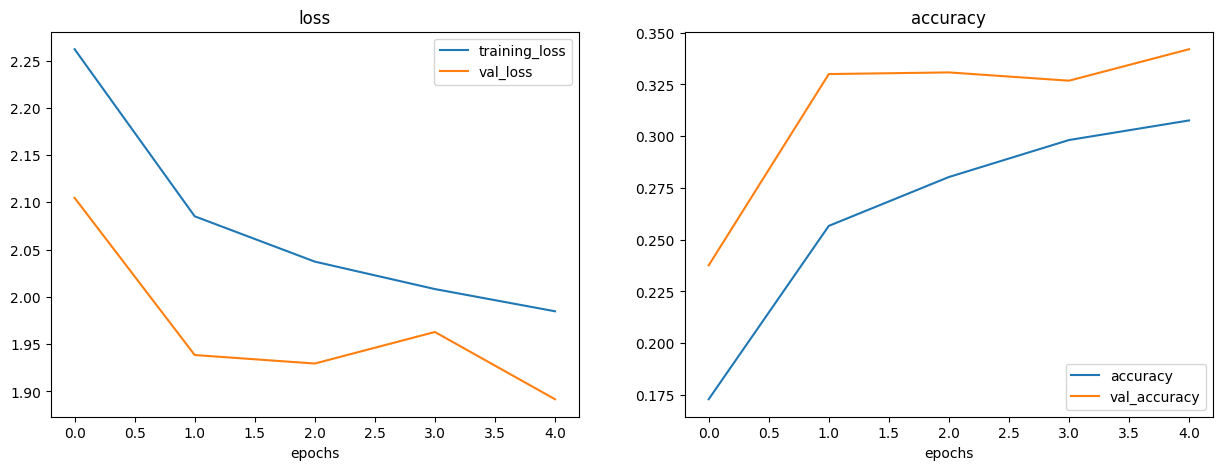

In [95]:
plot_loss_curve(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we train for longer, we might see futher improvements.


## 7. Repeat until satisfied

We could keep going here.. continally trying to bring our loss curve closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:

- restructuring our model's (increasing layer/hidden units)
- ajust the learning rate
- try different methods of data augmentation (adjust the hyperameters in our ImageDataGenerator instance)
- training for longer (e.g 10 epochs instead 5 epochs)
- try transfer learning


### Making a prediction with our trained model

Let's use our model to make some predictions on our own custom images!


In [97]:
# remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [98]:
# download some images
base_url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/'
filenames = ['03-steak.jpeg', '03-hamburger.jpeg',
             '03-pizza-dad.jpeg', '03-sushi.jpeg']

for filename in filenames:
    url = base_url + filename

    if not os.path.exists(f'{IMAGE_PATH}/{filename}'):
        urllib.request.urlretrieve(url, f'{IMAGE_PATH}/{filename}')

In [99]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
        imports an image located at filename, makes a predictions with model
        and plots the image with the predicted class as the title
    """

    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        # get the predicted class
        pred_class = class_names[int(tf.round(pred))]

    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 28ms/step


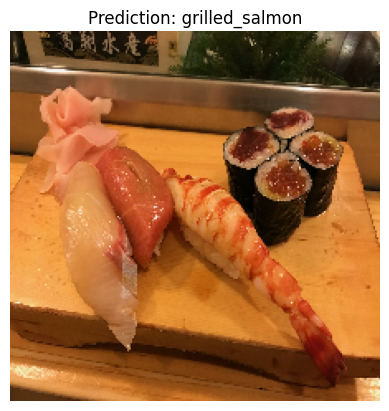

In [115]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename=f'{IMAGE_PATH}/{filenames[3]}',
              class_names=class_names)

Looks like our model didn't perform very well on your custom images,


## Saving and loading our Model


In [119]:
model_10.save(f'{MODEL_PATH}/saved_trained_model_10')

INFO:tensorflow:Assets written to: ..\storage/models/saved_trained_model_10\assets


INFO:tensorflow:Assets written to: ..\storage/models/saved_trained_model_10\assets


In [121]:
# Load in trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model(f'{MODEL_PATH}/saved_trained_model_10')

In [122]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 1.8918 - accuracy: 0.3420


[1.8917579650878906, 0.34200000762939453]